In [27]:
#教師なし学習
#blobsデータセット使用
from sklearn.datasets import make_blobs
import numpy as np
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

#K平均法によるクラスタリング
from sklearn.cluster import KMeans
k=5
kmeans=KMeans(n_clusters=k)
y_pred=kmeans.fit_predict(X)
y_pred
kmeans.labels_ is y_pred
kmeans.cluster_centers_
X_new=np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)
kmeans.transform(X_new)
kmeans.inertia_

#ミニバッチK平均法
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans=MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)


MiniBatchKMeans(n_clusters=5)

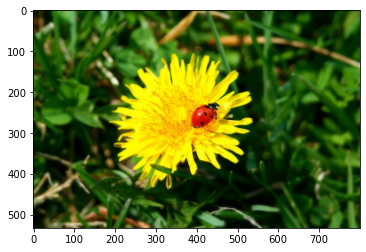

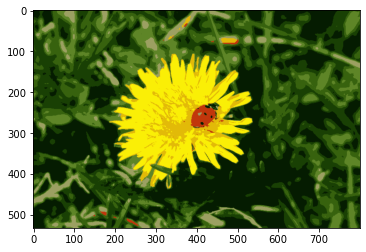

In [45]:
PROJECT_ROOT_DIR = "."
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
import urllib
urllib.request.urlretrieve(url, os.path.join(images_path, filename))
import os
from matplotlib.image import imread
image = imread(os.path.join("images","unsupervised_learning","ladybug.png"))
image.shape
plt.imshow(image)
plt.show()
X=image.reshape(-1,3) ##形状変換
kmeans=KMeans(n_clusters=8).fit(X) ##8クラス（ベクトル）に分割
segmented_img=kmeans.cluster_centers_[kmeans.labels_]

segmented_img=segmented_img.reshape(image.shape)
plt.imshow(segmented_img)
plt.show()

In [2]:
#K平均法に基づいてクラスタリング　結果をロジスティック回帰で処理
from sklearn.datasets import load_digits
X_digits,y_digits=load_digits(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_digits,y_digits)

from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver="lbfgs",max_iter=5000,multi_class="ovr")
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

pipeline=Pipeline([
    ("kmeans",KMeans(n_clusters=50)),
    ("log_reg",LogisticRegression(solver="lbfgs",max_iter=5000,multi_class="ovr"))
])
pipeline.fit(X_train,y_train)

pipeline.score(X_test,y_test)

#クラスタ数の最適値をグリッドサーチで探索
from sklearn.model_selection import GridSearchCV
param_distributions=dict(kmeans__n_clusters=range(2,100))
grid_search=GridSearchCV(pipeline,param_distributions,cv=3,verbose=2)##randomでは関数分布があり、そこからn_iterでサンプル数をしていして、パラメータ抽出、その乱数ジェネレータをrandom_stateで指定
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)
grid_search.score(X_test,y_test)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   0.3s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.4s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.4s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.4s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.5s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.4s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[CV] ............................ kmeans__n_clusters=21, total=   8.1s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   7.2s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   8.7s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   9.4s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=  11.8s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=  10.4s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   9.8s
[CV] kmeans__n_clusters=24 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=41, total=  12.1s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=  11.6s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=  13.2s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   9.7s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=  11.6s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=  10.2s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=  15.7s
[CV] kmeans__n_clusters=43 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=60, total=  13.1s
[CV] kmeans__n_clusters=60 ...........................................
[CV] ............................ kmeans__n_clusters=60, total=  12.4s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=  13.3s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=  13.3s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=  12.6s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=  13.3s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=  13.1s
[CV] kmeans__n_clusters=62 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=79, total=  11.1s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=  11.4s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=  13.2s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=  13.5s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=  15.3s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=  15.7s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=  15.1s
[CV] kmeans__n_clusters=82 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=99, total=  14.3s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=  13.7s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=  13.2s


[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 54.1min finished


{'kmeans__n_clusters': 92}


0.9911111111111112

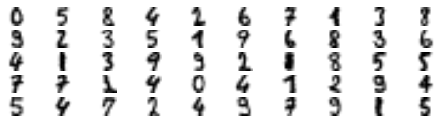

1.0

In [97]:
#半教師あり
n_labeled=50
log_reg=LogisticRegression(solver="lbfgs",max_iter=5000,random_state=42,multi_class="ovr")
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])

log_reg.score(X_test,y_test)

k=50
kmeans=KMeans(n_clusters=50,random_state=42)
x_digits_dist=kmeans.fit_transform(X_train)
representative_digit_idx=np.argmin(x_digits_dist,axis=0)##axis デフォルトでは、インデックスはフラット化された配列に入ります。
X_representative_digits=X_train[representative_digit_idx]
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()
#print(y_train[representative_digit_idx])
y_representative_digits=np.array([0,5,8,4,2,6,7,1,3,8,9,2,3,5,1,9,6,8,3,6,4,1,3,9,9,2,1,8,5,5,7,7,1,4,0,4,
                                  1,2,9,4,5,4,7,2,4,9,7,9,1,5])

log_reg=LogisticRegression(solver="lbfgs",max_iter=5000,random_state=42,multi_class="ovr")
log_reg.fit(X_representative_digits,y_representative_digits)
log_reg.score(X_test,y_test)

y_train_propagated=np.empty(len(X_train),dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i]=y_representative_digits[i]
    
log_reg=LogisticRegression(max_iter=5000,solver="lbfgs",random_state=42,multi_class="ovr")
log_reg.fit(X_train,y_train_propagated)
log_reg.score(X_test,y_test)

percentile_closest=20

X_cluster_dist=x_digits_dist[np.arange(len(X_train)),kmeans.labels_]
for i in range(k):
    in_cluster=(kmeans.labels_==i)
    cluster_dist=X_cluster_dist[in_cluster]
    cutoff_distance=np.percentile(cluster_dist,percentile_closest)
    above_cutoff=(X_cluster_dist> cutoff_distance)
    X_cluster_dist[in_cluster&above_cutoff]=-1
    
partially_propagated=(X_cluster_dist !=-1)
X_train_partially_propagated=X_train[partially_propagated]
y_train_partially_propagated=y_train[partially_propagated]

log_reg=LogisticRegression(max_iter=5000,solver="lbfgs",random_state=42,multi_class="ovr")
log_reg.fit(X_train_partially_propagated,y_train_partially_propagated)
log_reg.score(X_test,y_test)

np.mean(y_train_partially_propagated==y_train[partially_propagated])



In [116]:
#DBSCANを用いたクラスタリング
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X,y=make_moons(n_samples=1000,noise=0.05)
dbscan=DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(X)

dbscan.labels_

from sklearn.neighbors import KNeighborsClassifier
dbscan=DBSCAN(eps=0.2)
dbscan.fit(X)
knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_,dbscan.labels_[dbscan.core_sample_indices_])

X_new=np.array([[-0.5,0],[0,0.5],[1,-0.1],[2,1]])
knn.predict(X_new)
knn.predict_proba(X_new)



array([[0.84, 0.16],
       [0.  , 1.  ],
       [0.76, 0.24],
       [0.  , 1.  ]])

In [119]:
#DBSCAN
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X,y=make_moons(n_samples=1000,noise=0.05)
dbscan=DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(X)

dbscan.labels_
dbscan.core_sample_indices_[:10]
dbscan.components_[:3]

y_dist,y_pred_idx=knn.kneighbors(X_new,n_neighbors=1)
y_pred=dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist>0.2]=-1
y_pred.ravel()


array([-1,  4,  1, -1], dtype=int64)

In [124]:
#HDBSCAN
import hdbscan
from sklearn.datasets import make_blobs

data, y = make_blobs(1000)

clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = clusterer.fit_predict(data)


In [16]:
#混合ガウス
import numpy as np
from sklearn.datasets import make_blobs
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

from sklearn.mixture import GaussianMixture

gm=GaussianMixture(n_components=3,n_init=10)
gm.fit(X)

gm.weights_, gm.means_,gm.covariances_
gm.converged_,gm.n_iter_
gm.predict(X),gm.predict_proba(X)
X_new,y_new=gm.sample(6)
X_new
y_new
gm.score_samples(X)
densities=gm.score_samples(X)
densitie_threshold= np.percentile(densities,4)
anomality=X[densities<densitie_threshold]
gm.bic(X),gm.aic(X)
from sklearn.mixture import BayesianGaussianMixture
bgm=BayesianGaussianMixture(n_components=10,n_init=10)
bgm.fit(X)
np.round(bgm.weights_,2)




array([0.4 , 0.21, 0.39, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

Cluster 0


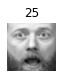

Cluster 1


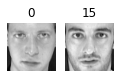

Cluster 2


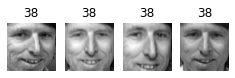

Cluster 3


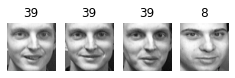

Cluster 4


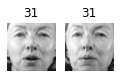

Cluster 5


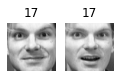

Cluster 6


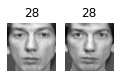

Cluster 7


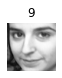

Cluster 8


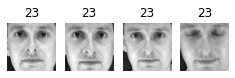

Cluster 9


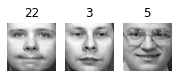

Cluster 10


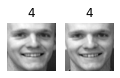

Cluster 11


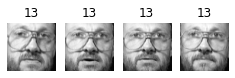

Cluster 12


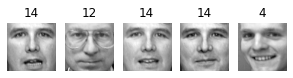

Cluster 13


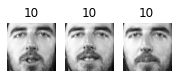

Cluster 14


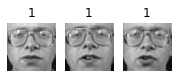

Cluster 15


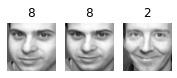

Cluster 16


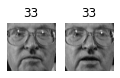

Cluster 17


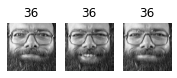

Cluster 18


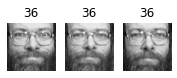

Cluster 19


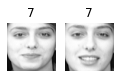

Cluster 20


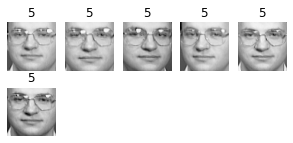

Cluster 21


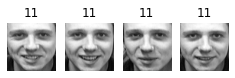

Cluster 22


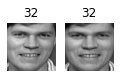

Cluster 23


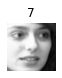

Cluster 24


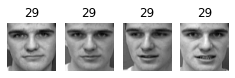

Cluster 25


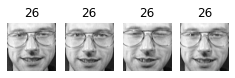

Cluster 26


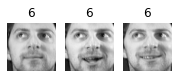

Cluster 27


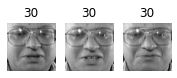

Cluster 28


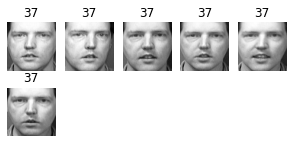

Cluster 29


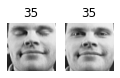

Cluster 30


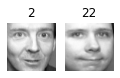

Cluster 31


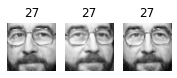

Cluster 32


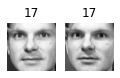

Cluster 33


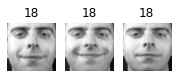

Cluster 34


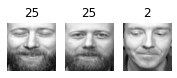

Cluster 35


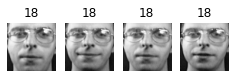

Cluster 36


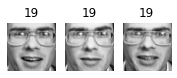

Cluster 37


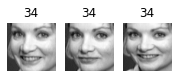

Cluster 38


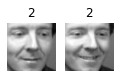

Cluster 39


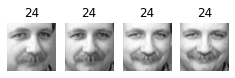

Cluster 40


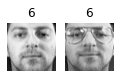

Cluster 41


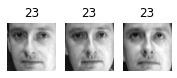

Cluster 42


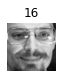

Cluster 43


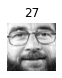

Cluster 44


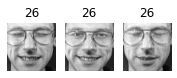

Cluster 45


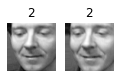

Cluster 46


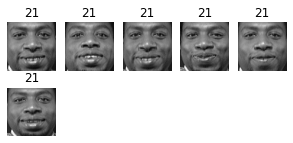

Cluster 47


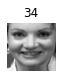

Cluster 48


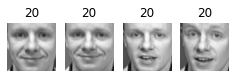

Cluster 49


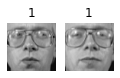

Cluster 50


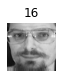

Cluster 51


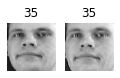

Cluster 52


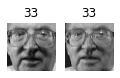

Cluster 53


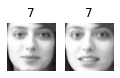

Cluster 54


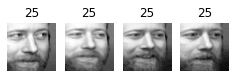

Cluster 55


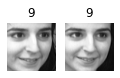

Cluster 56


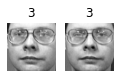

Cluster 57


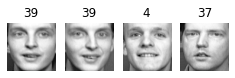

Cluster 58


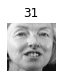

Cluster 59


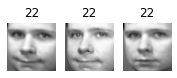

Cluster 60


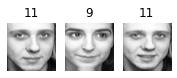

Cluster 61


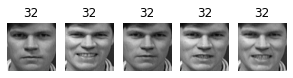

Cluster 62


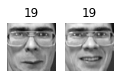

Cluster 63


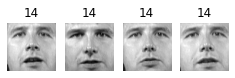

Cluster 64


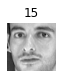

Cluster 65


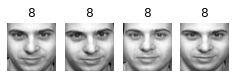

Cluster 66


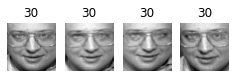

Cluster 67


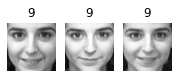

Cluster 68


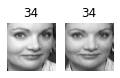

Cluster 69


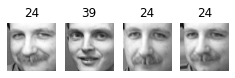

Cluster 70


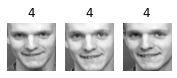

Cluster 71


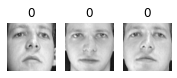

Cluster 72


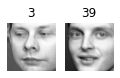

Cluster 73


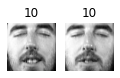

Cluster 74


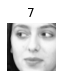

Cluster 75


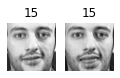

Cluster 76


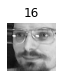

Cluster 77


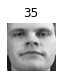

Cluster 78


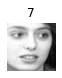

Cluster 79


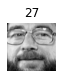

Cluster 80


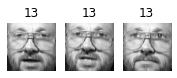

Cluster 81


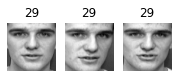

Cluster 82


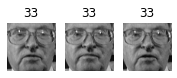

Cluster 83


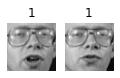

Cluster 84


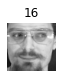

Cluster 85


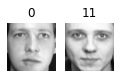

Cluster 86


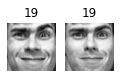

Cluster 87


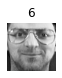

Cluster 88


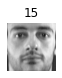

Cluster 89


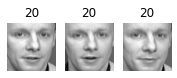

Cluster 90


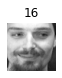

Cluster 91


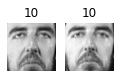

Cluster 92


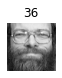

Cluster 93


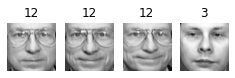

Cluster 94


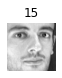

Cluster 95


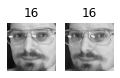

Cluster 96


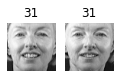

Cluster 97


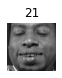

Cluster 98


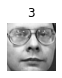

Cluster 99


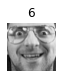

Cluster 100


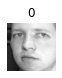

Cluster 101


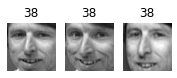

Cluster 102


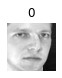

Cluster 103


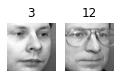

Cluster 104


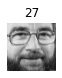

Cluster 105


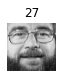

Cluster 106


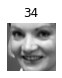

Cluster 107


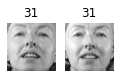

Cluster 108


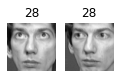

Cluster 109


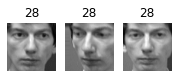

Cluster 110


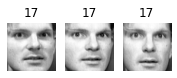

Cluster 111


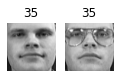

Cluster 112


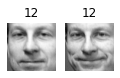

Cluster 113


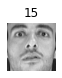

Cluster 114


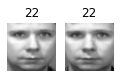

In [7]:
#オリベッティデータ
from sklearn.datasets import fetch_olivetti_faces
olivetti=fetch_olivetti_faces()
X=olivetti.data
y=olivetti.target

from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1,test_size=40,random_state=0)
train_valid_idx,test_idx=next(sss.split(X,y))

X_train_valid=X[train_valid_idx]
y_train_valid=y[train_valid_idx]
X_test=X[test_idx]
y_test=y[test_idx]

sss=StratifiedShuffleSplit(n_splits=1,test_size=80,random_state=0)
train_idx,valid_idx=next(sss.split(X_train_valid,y_train_valid))
X_train=X_train_valid[train_idx]
y_train=y_train_valid[train_idx]
X_valid=X_train_valid[valid_idx]
y_valid=y_train_valid[valid_idx]

from sklearn.decomposition import PCA

pca=PCA(n_components=0.99)
X_train_pca=pca.fit_transform(X_train)
X_valid_pca=pca.transform(X_valid)
X_test_pca=pca.transform(X_test)

pca.n_components_

from sklearn.cluster import KMeans

k_range=range(5,150,5)
kmeans_per_k=[]
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

import numpy as np
from sklearn.metrics import silhouette_score
silhouette_score_box=[]
for k in kmeans_per_k:
    silhouette_score_box.append(silhouette_score(
    X_train_pca,k.labels_))
silhouette_scores=[silhouette_score(X_train_pca
                                ,model.labels_) for model in kmeans_per_k]
best_idx=np.argmax(silhouette_scores)
best_k=kmeans_per_k[best_idx]

for k in kmeans_per_k:
    k.transform(X_train_pca)
import matplotlib.pyplot as plt
best_model = kmeans_per_k[best_idx]
def plot_faces(faces, labels, n_cols=5):
    n_rows=(len(faces)-1)//n_cols+1
    plt.figure(figsize=(n_cols,n_rows*1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows,n_cols,index+1)
        plt.imshow(face.reshape(64,64),cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()    

for cluster_id in np.unique(best_model.labels_):
    print("Cluster",cluster_id)
    in_cluster=best_model.labels_==cluster_id
    faces=X_train[in_cluster].reshape(-1,64,64)
    labels=y_train[in_cluster]
    plot_faces(faces, labels)


In [11]:
from sklearn.datasets import fetch_olivetti_faces
olivetti=fetch_olivetti_faces()
X=olivetti.data
y=olivetti.target

from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1,test_size=40,random_state=0)
train_valid_idx,test_idx=next(sss.split(X,y))

X_train_valid=X[train_valid_idx]
y_train_valid=y[train_valid_idx]
X_test=X[test_idx]
y_test=y[test_idx]

sss=StratifiedShuffleSplit(n_splits=1,test_size=80,random_state=0)
train_idx,valid_idx=next(sss.split(X_train_valid,y_train_valid))
X_train=X_train_valid[train_idx]
y_train=y_train_valid[train_idx]
X_valid=X_train_valid[valid_idx]
y_valid=y_train_valid[valid_idx]

from sklearn.decomposition import PCA

pca=PCA(n_components=0.99)
X_train_pca=pca.fit_transform(X_train)
X_valid_pca=pca.transform(X_valid)
X_test_pca=pca.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=150,random_state=42)

rnd_clf.fit(X_train_pca,y_train)
rnd_clf.score(X_valid_pca,y_valid)

from sklearn.cluster import KMeans

k_range=range(5,150,5)
kmeans_per_k=[]
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

import numpy as np
from sklearn.metrics import silhouette_score
silhouette_score_box=[]
for k in kmeans_per_k:
    silhouette_score_box.append(silhouette_score(
    X_train_pca,k.labels_))
silhouette_scores=[silhouette_score(X_train_pca
                                ,model.labels_) for model in kmeans_per_k]
best_idx=np.argmax(silhouette_scores)
best_k=kmeans_per_k[best_idx]

for k in kmeans_per_k:
    k.transform(X_train_pca)
import matplotlib.pyplot as plt
best_model = kmeans_per_k[best_idx]

X_train_reduced=best_model.transform(X_train_pca)
X_valid_reduced=best_model.transform(X_valid_pca)
X_test_reduced=best_model.transform(X_test_pca)

rnd_clf=RandomForestClassifier(n_estimators=150,random_state=42)
rnd_clf.fit(X_train_reduced,y_train)
rnd_clf.score(X_valid_reduced,y_valid)

from sklearn.pipeline import Pipeline

for n_clusters in k_range:
    pipeline=Pipeline([
        ("kmeans",KMeans(n_clusters=n_clusters,random_state=n_clusters)),
        ("forest_clf",RandomForestClassifier(n_estimators=150,random_state=42))
])
    pipeline.fit(X_train_pca,y_train)
    print(n_clusters,pipeline.score(X_valid_pca,y_valid))

X_train_extended=np.c_[X_train_pca,X_train_reduced]
X_valid_extended=np.c_[X_valid_pca,X_valid_reduced]
X_test_extended=np.c_[X_test_pca,X_test_reduced]

clf=RandomForestClassifier(n_estimators=150,random_state=42)
clf.fit(X_train_extended,y_train)
clf.score(X_valid_extended,y_valid)



5 0.4875
10 0.5875
15 0.6375
20 0.6625
25 0.7125
30 0.7375
35 0.775
40 0.7625
45 0.75
50 0.7125
55 0.7625
60 0.75
65 0.7375
70 0.75
75 0.75
80 0.7375
85 0.7875
90 0.7625
95 0.7625
100 0.8125
105 0.775
110 0.775
115 0.75
120 0.7625
125 0.8
130 0.8125
135 0.7625
140 0.775
145 0.7875


0.8625

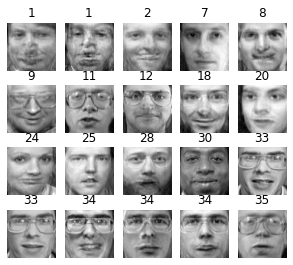

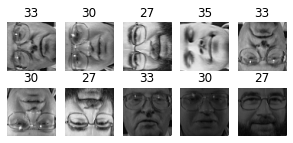

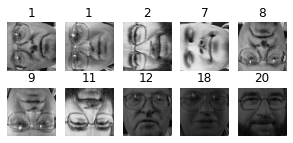

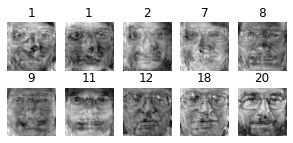

In [35]:
from sklearn.datasets import fetch_olivetti_faces
olivetti=fetch_olivetti_faces()
X=olivetti.data
y=olivetti.target

from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1,test_size=40,random_state=0)
train_valid_idx,test_idx=next(sss.split(X,y))

X_train_valid=X[train_valid_idx]
y_train_valid=y[train_valid_idx]
X_test=X[test_idx]
y_test=y[test_idx]

sss=StratifiedShuffleSplit(n_splits=1,test_size=80,random_state=0)
train_idx,valid_idx=next(sss.split(X_train_valid,y_train_valid))
X_train=X_train_valid[train_idx]
y_train=y_train_valid[train_idx]
X_valid=X_train_valid[valid_idx]
y_valid=y_train_valid[valid_idx]

from sklearn.decomposition import PCA
pca=PCA(n_components=0.99)
X_train_pca=pca.fit_transform(X_train)

from sklearn.mixture import GaussianMixture
gm=GaussianMixture(n_components=40,random_state=42)
y_pred=gm.fit_predict(X_train_pca)
X_new_reduced,y_new=gm.sample(20)
X_new=pca.inverse_transform(X_new_reduced)

def plot_faces(faces,labels,n_cols=5):
    n_rows=(len(faces)-1)//n_cols+1
    plt.figure(figsize=(n_cols,n_rows*1.1))
    for index, (face,label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows,n_cols, index+1)
        plt.imshow(face.reshape(64,64),cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()
    
plot_faces(X_new,y_new)    

n_rotated=4
rotated = np.transpose(X_train[:n_rotated].reshape(-1,64,64),axes=[0,2,1])
rotated=rotated.reshape(-1,64*64)
y_rotated=y_train[:n_rotated]

n_flipped=3
flipped=X_train[:n_flipped].reshape(-1,64,64)[:,::-1]
flipped=flipped.reshape(-1,64*64)
y_flipped=y_train[:n_flipped]

n_darkness=3
darkned=X_train[:n_darkness].copy()
darkned[:,1:-1]*=0.3
darkned=darkned.reshape(-1,64*64)
y_darkned=y_train[:n_darkness]

X_bad_faces=np.r_[rotated,flipped,darkned]
y_bad=np.concatenate([y_rotated,y_flipped,y_darkned])

plot_faces(X_bad_faces,y_bad)

X_bad_faces_pca=pca.transform(X_bad_faces)
gm.score_samples(X_bad_faces_pca),gm.score_samples(X_train_pca[:10])

n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)
def reconstruction_errors(pca, X):
    X_pca= pca.transform(X)
    X_reconstructed=pca.inverse_transform(X_pca)
    mse=np.square(X_reconstructed -X).mean(axis=-1)##最後の軸
    return mse

reconstruction_errors(pca, X_train).mean()

reconstruction_errors(pca,X_bad_faces).mean()

plot_faces(X_bad_faces,y_gen_faces)

X_bad_faces_reconstructed=pca.inverse_transform(X_bad_faces_pca)

plot_faces(X_bad_faces_reconstructed,y_gen_faces)

